# dARK Evaluation

descrever

In [81]:
import os
import pandas as pd
import seaborn as sns
import numpy as np

In [200]:
df = pd.read_csv('data' +os.sep + 'resultado_oasisbr_1_1000_2000.csv')
lf = pd.read_csv('data' +os.sep +'resultado_casa_oasisbr_1_10000_10500.csv')

In [226]:
nb = 61078176
nkb = nb/1024
nmb = nkb/1024
nkb,nmb

(59646.65625, 58.248687744140625)

In [225]:

total_payload = df[df.action == 'assingID'].payload_len.sum()
total_sk = len(df) * ( 12 + 32)
total_pid = len(df) * ( 32 + 12 + 60)


total_data = total_payload + total_sk + total_pid

print("Total = {} ( payload {} in Kb".format(total_data/1024,total_payload/1024))

Total = 1350.2451171875 ( payload 257.5888671875 in Kb


# eda

In [178]:
df

,Unnamed: 0,id,payload_len,num_authors,num_topics,action,gas,time,bins_gas
0,0,FAPESP-1_fb3a6da8702f30ea84b7e12b026aa473,296,1,5,assingID,255373,0.752576,193693.0 to 266772.0
1,1,FAPESP-1_fb3a6da8702f30ea84b7e12b026aa473,296,1,5,addSearchTerm,309307,1.972863,266772.0 to 339852.0
2,2,FAPESP-1_fb3a6da8702f30ea84b7e12b026aa473,296,1,5,addSearchTerm,287822,1.982849,266772.0 to 339852.0
3,3,FAPESP-1_fb3a6da8702f30ea84b7e12b026aa473,296,1,5,addSearchTerm,300262,1.979661,266772.0 to 339852.0
4,4,FAPESP-1_fb3a6da8702f30ea84b7e12b026aa473,296,1,5,addSearchTerm,358154,2.084855,339852.0 to 412931.0
...,...,...,...,...,...,...,...,...,...
7555,7555,ABRA-FT-1_3269348d0970c37268c405d52a4eab8e,225,1,6,addSearchTerm,303890,1.966990,266772.0 to 339852.0
7556,7556,ABRA-FT-1_3269348d0970c37268c405d52a4eab8e,225,1,6,addSearchTerm,209140,2.063294,193693.0 to 266772.0
7557,7557,ABRA-FT-1_3269348d0970c37268c405d52a4eab8e,225,1,6,addSearchTerm,291056,1.970367,266772.0 to 339852.0
7558,7558,ABRA-FT-1_3269348d0970c37268c405d52a4eab8e,225,1,6,addExternalLink,291056,1.957838,266772.0 to 339852.0


In [183]:
tdf = df[df.action == "setPayload"]
mdf = pd.melt(tdf, id_vars=['id'], value_vars=['payload_len', 'num_authors', 'num_topics'])

Text(0.5, 1.0, 'Payload length distribution')

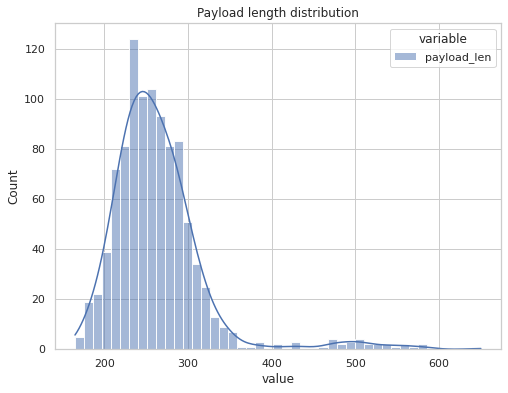

In [211]:
f, ax = plt.subplots(figsize=(8, 6))
g = sns.histplot(mdf[mdf.variable=='payload_len'],x='value', hue='variable', kde=True)
g.set_title("Payload length distribution")
# ,cmap="#4CB391")
# , discrete=(True, False),
    # kind="hex",
    # , pmax=.8, cbar=True, cbar_ax=cax



# sns.jointplot(data=df, x='payload_len', y='time', kind="hex", color="#4CB391")

Text(0.5, 1.0, 'Authors and Topics Distribution')

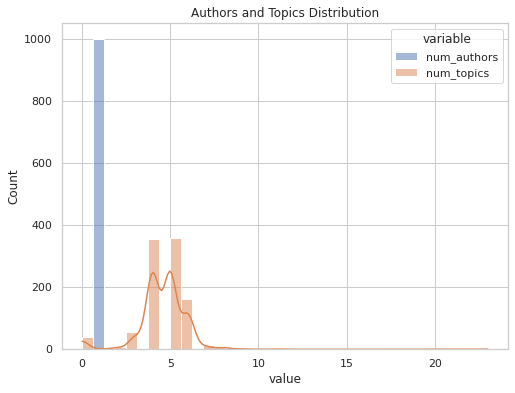

In [212]:
f, ax = plt.subplots(figsize=(8, 6))

g = sns.histplot(mdf[mdf.variable!='payload_len'],x='value', hue='variable', kde=True)
g.set_title("Authors and Topics Distribution")

# results

In [215]:
def create_label(df,n_cluster,variable):
    diff = df[variable].max() - df[variable].min()
    scale = np.arange(df.gas.min(),df.gas.max(), diff/n_cluster)
    labels = []
    for i in range(nc):
        if len(labels) == 0:
            labels.append(str(round(scale[i],0)) + " to " + str(round(scale[i+1],0)))
        else:
            if len(labels) < n_cluster-1:
                labels.append(str(round(scale[i],0)) + " to " + str(round(scale[i+1],0)))

    df['bins_'+variable] = pd.cut(df[variable], scale, labels=labels)
    return df

df = create_label(df,5,'gas')
# df = create_label(df,3,'time')

## gas e tempo

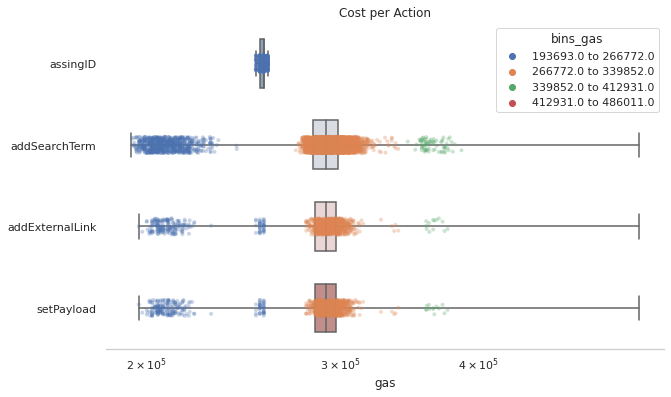

In [245]:
sns.set_theme(style="whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale("log")
ax.set_title("Cost per Action")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="gas", y="action", data=df,
            whis=[0, 100], 
            width=.6, palette="vlag")

# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# Add in points to show each observation
sns.stripplot(x="gas", y="action", data=df,
              size=4, 
            #   color=".3", 
              hue="bins_gas",
              alpha=0.3,
              # palette=,
              linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
# sns.despine(trim=True, left=True)
sns.despine(left=True)

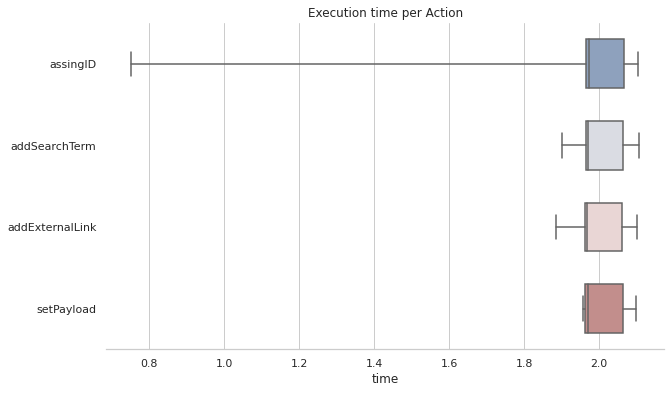

In [246]:
sns.set_theme(style="whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
# ax.set_xscale("log")
ax.set_title("Execution time per Action")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="time", y="action", data=df,
            whis=[0, 100], 
            width=.6, palette="vlag")

# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# Add in points to show each observation
# sns.stripplot(x="time", y="action", data=df,
#               size=4, 
#               color=".3", 
#             #   hue="bins_gas",
#               alpha=0.3,
#               # palette=,
#               linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
# sns.despine(trim=True, left=True)
sns.despine(left=True)

## working

15.118652702093124

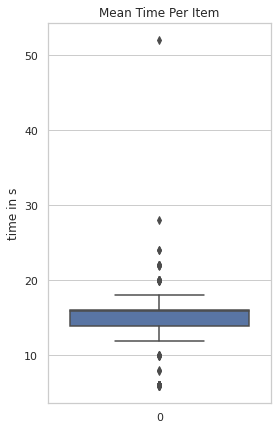

In [241]:

mtt = df.groupby('id')['time'].sum()
f, ax = plt.subplots(figsize=(4,7))
# ax.set_yscale("log")
ax.set_ylabel("time in s")
g = sns.boxplot(mtt)
g.set_title("Mean Time Per Item")
df.groupby('id')['time'].sum().mean()

## local vs remoto

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_yscale("log")
ax.set_title("TIme")
sns.barplot(temp, x="action", y="time", hue='local',errorbar=('ci', 99))

# Scratch

In [95]:
# df.gas = df.gas / np.power(10,9) # gwei to ether
# df.gas = df.gas / 10000
# df.gas = df.gas.round(1)
# df.gas = df.gas.astype(int)
# df.gas = df.gas.astype(str) + 'k'

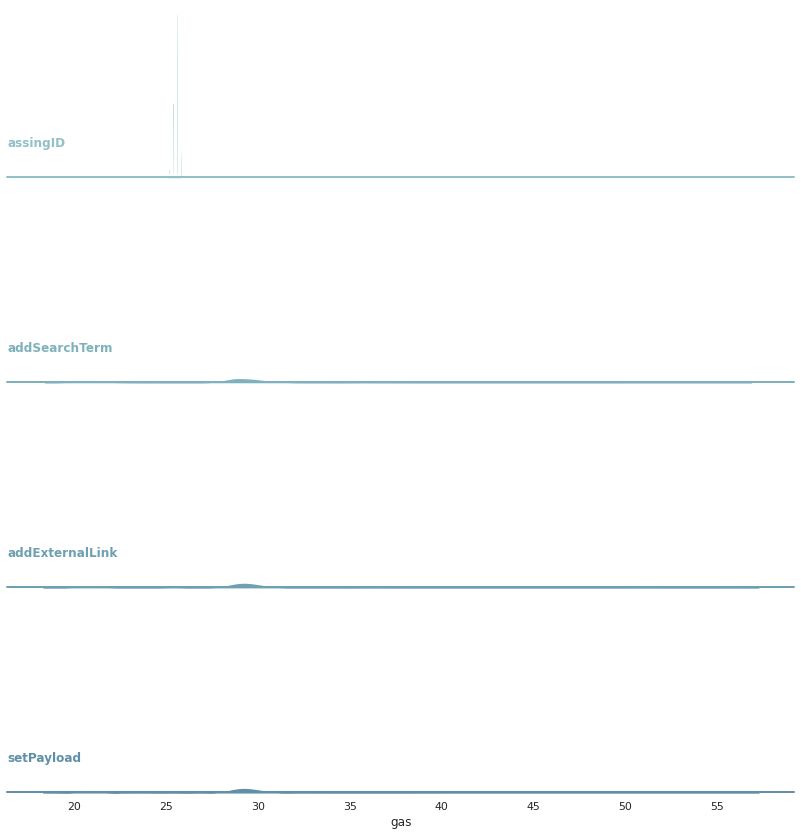

In [88]:
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
target = "gas" # time

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="action", hue="action", aspect=4, height=3, palette=pal,
                  sharex=True
                  )
# Draw the densities in a few steps
g.map(sns.kdeplot, target,
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)#.set(yscale = 'log')
g.map(sns.kdeplot, target, clip_on=False, color="w", lw=2, bw_adjust=.5)#.set(yscale = 'log')

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, target)

# Set the subplots to overlap
# g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [23]:
# sns.set_theme(style="whitegrid")

# # Initialize the figure
# f, ax = plt.subplots()
# sns.despine(bottom=True, left=True)

# # Show each observation with a scatterplot
# sns.stripplot(
#     data=df, x="gas", y="action", hue="action",
#     dodge=True, alpha=.25, zorder=1, legend=False
# )

# # Show the conditional means, aligning each pointplot in the
# # center of the strips by adjusting the width allotted to each
# # category (.8 by default) by the number of hue levels
# sns.pointplot(
#     data=df, x="gast", y="action", hue="action",
#     join=False, dodge=.8 - .8 / 3, palette="dark",
#     markers="d", scale=.75, errorbar=None
# )

# # Improve the legend
# sns.move_legend(
#     ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0
# )

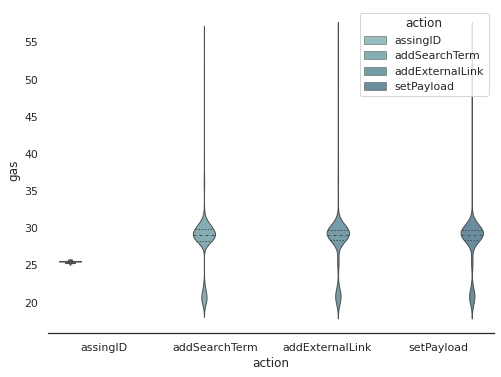

In [89]:
target = "gas" # time

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 6))
# ax.set_xscale("log")
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="action", y=target, hue='action',
               # split=True, 
               inner="quart", linewidth=1,
               palette=pal
            #    palette={"Yes": "b", "No": ".85"}
            )
sns.despine(left=True)



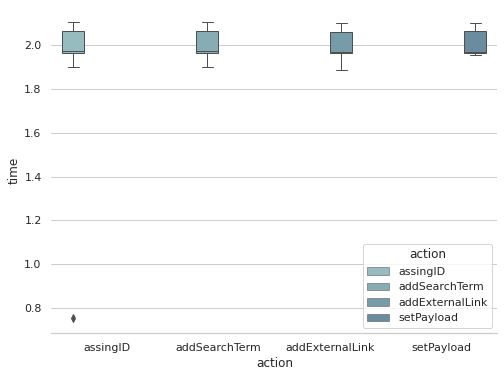

In [91]:
target = "time" # time

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 6))
# ax.set_xscale("log")
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(data=df, x="action", y=target, hue='action',
               # split=True, 
            #    inner="quart", 
               linewidth=1,
               palette=pal
            #    palette={"Yes": "b", "No": ".85"}
            )
# Add in points to show each observation
# sns.stripplot(data=df, x="action", y=target,
#               size=4, color=".3", linewidth=0)

sns.despine(left=True)

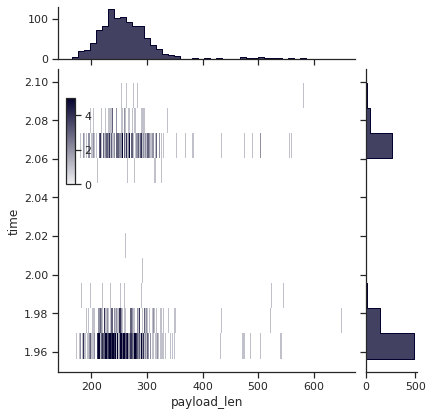

In [161]:
target = "time" # time
sdf = df[df.action=='setPayload']

# Initialize the figure with a logarithmic x axis
sns.set_theme(style="ticks")
# f, ax = plt.subplots(figsize=(8, 6))
# ax.set_xscale("log")
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)


# Load the planets dataset and initialize the figure
g = sns.JointGrid(data=sdf, x="payload_len", y=target, marginal_ticks=True)

# Set a log scaling on the y axis
# g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    # kind="hex",
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

In [201]:
l = df.copy()
l['local'] = "local"
lf['local'] = 'remote'

temp = pd.concat([l,lf])

<AxesSubplot: title={'center': 'TIme'}, xlabel='action', ylabel='time'>

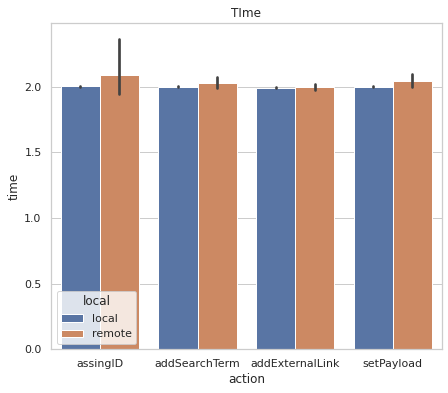

In [210]:
f, ax = plt.subplots(figsize=(7, 6))
# ax.set_yscale("log")
ax.set_title("TIme")
sns.barplot(temp, x="action", y="time", hue='local',errorbar=('ci', 99))

In [204]:
# sns.jointplot(df, x='payload_len', y='time', kind="hex", color="#4CB391")
# sns.stripplot(df, x="payload_len", y="time")